# Deterministic Modelling for LacY and T7

In [55]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from scipy.integrate import odeint
from scipy.integrate import ode

In [56]:
#to have [R2]T reach 2000 instead of 20
k_smr = 24.67
#k_smr = 0

k_sr = 15
k_2r = 50
k_Neg_2r = 1e-3
k_ry = 960
k_Neg_ry = 2.4
k_dr1 = 3e-7
k_Neg_dr1 = 12
k_dr4 = 3e-7
k_Neg_dr4 = 4.8e3
k_s0my = 0.01
k_s1my = 0.5
k_sy = 30
k_p = 0.12
k_Neg_p = 0.1
k_ft = 6e4
k_t = 0.92

lambda_mr = 0.462
lambda_r = 0.2
lambda_i2r2 = 0.2
lambda_r2 = 0.2
lambda_my = 0.462
lambda_y = 0.2
lambda_yiex = 0.2


#rates for t7
k_s0mt7 = 0.01
k_rt7 = 960
k_Neg_rt7 = 2.4
k_dr2 = 3e-7
k_Neg_dr2 = 4.8e3

#rates to be modified；at R = 0, T7_mRNA = 667, T7 = 14673
k_s1mt7 = 148.15
lambda_mt7 = 0.462
k_st7 = 4.4
lambda_t7 = 0.2

In [57]:
def f(y, t):
     mr = y[0]
     r = y[1]
     r2 = y[2]
     oy = y[3]
     ot7 = y[4]
     i = y[5]
     i2r2 = y[6]
     my = y[7]
     lac_Y = y[8]
     mt7 = y[9]
     t7 = y[10]
     yiex = y[11]
     #iex = y[12]

     f0 = k_smr - lambda_mr*mr
     f1 = k_sr*mr - 2*k_2r*r*r + 2*k_Neg_2r*r2 - lambda_r*r
     f2 = k_2r*r*r - k_Neg_2r*r2 - k_rt7*r2*ot7 + k_Neg_rt7*(2.08-ot7) - k_ry*r2*oy + k_Neg_ry*(2.08-oy) - k_dr1*i*i*r2 + k_Neg_dr1*i2r2 - lambda_r2*r2
     f3 = -k_ry*r2*oy + k_Neg_ry*(2.08-oy) + k_dr4*i*i*(2.08-oy) - k_Neg_dr4*i2r2*oy
     f4 = -k_rt7*r2*ot7 + k_Neg_rt7*(2.08-ot7) + k_dr2*i*i*(2.08-ot7) - k_Neg_dr2*i2r2*ot7
     f5 = -2*k_dr1*r2*i*i + 2*k_Neg_dr1*i2r2 - 2*k_dr2*(2.08-ot7)*i*i + 2*k_Neg_dr2*ot7*i2r2 - 2*k_dr4*(2.08-oy)*i*i + 2*k_Neg_dr4*oy*i2r2 + k_ft*yiex + k_t*(iex-i) + 2*lambda_i2r2*i2r2 + lambda_yiex*yiex
     f6 = k_dr1*i*i*r2 - k_Neg_dr1*i2r2 + k_dr2*i*i*(2.08-ot7) - k_Neg_dr2*i2r2*ot7 + k_dr4*i*i*(2.08-oy) - k_Neg_dr4*i2r2*oy - lambda_i2r2*i2r2
     f7 = k_s0my*(2.08-oy) + k_s1my*oy - lambda_my*my
     f8 = k_sy*my + (k_ft + k_Neg_p)*yiex - k_p*lac_Y*iex - lambda_y*lac_Y
     f9 = k_s0mt7*(2.08-ot7) + k_s1mt7*ot7 - lambda_mt7*mt7    
     f10 = k_st7*mt7 - lambda_t7*t7
     f11 = -(k_ft + k_Neg_p)*yiex + k_p*lac_Y*iex - lambda_yiex*yiex  
     #f12 = k_t*(i-iex) - k_p*lac_Y*iex + k_Neg_p*yiex 
     return [f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]


In [58]:
mr_0 = 0
r_0 = 0
r2_0 = 0
oy_0 = 2.08
ot7_0 = 2.08
i_0 = 0
i2r2_0 = 0
my_0 = 0
lac_Y_0 = 0
mt7_0 = 0
t7_0 = 0
yiex_0 = 0
#iex_0 = 100000
 
y0 = [mr_0, r_0, r2_0, oy_0, ot7_0, i_0, i2r2_0, my_0, lac_Y_0, mt7_0, t7_0, yiex_0]     

In [59]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

0 IPTG, T7:  1.00880798813
0 IPTG, LacI:  2.83621017884
0 IPTG, LacI dimer:  2001.01695985
0 IPTG, LacY:  6.75366017887


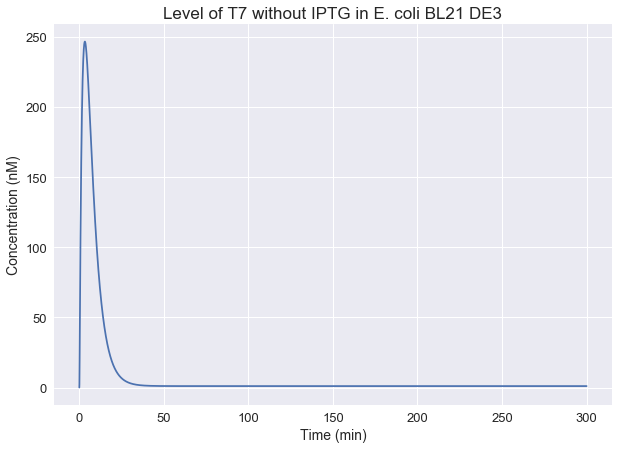

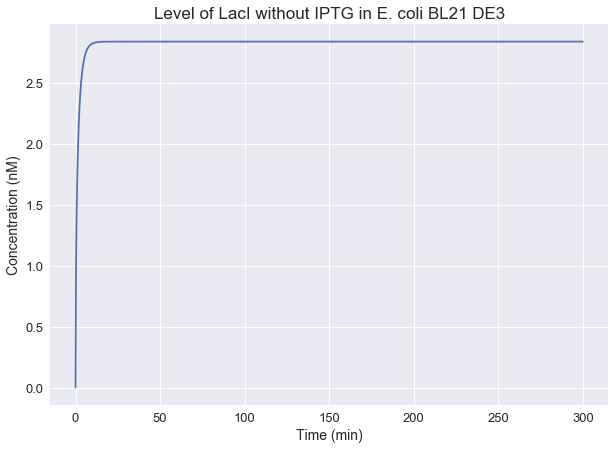

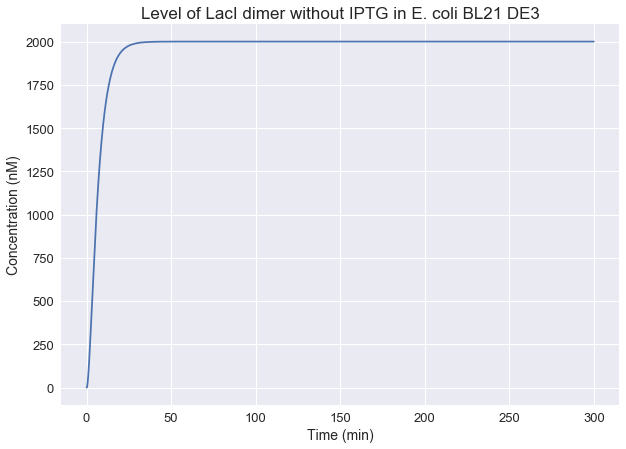

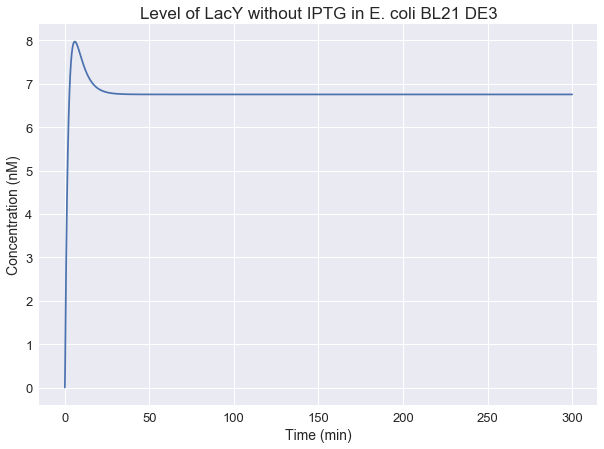

In [60]:
t  = np.linspace(0, 300, 10000) 
iex = 0

soln = odeint(f, y0, t)

mr_s = soln[:, 0]
r_s = soln[:, 1]
r2_s = soln[:, 2]
oy_s = soln[:, 3]
ot7_s = soln[:, 4]
i_s = soln[:, 5]
i2r2_s = soln[:, 6]
my_s = soln[:, 7]
lac_Y_s = soln[:, 8]
mt7_s = soln[:, 9]
t7_s = soln[:, 10]
yiex_s = soln[:, 11]
    
plt.figure(figsize=(10,7))
#plt.subplot(1, 3, 1)
plt.plot(t, t7_s)
plt.title('Level of T7 without IPTG in E. coli BL21 DE3',size=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Concentration (nM)', size=14)
plt.xlabel('Time (min)', size=14)
plt.savefig('T7 without IPTG.png', dpi=300)

plt.figure(figsize=(10,7))
#plt.subplot(1, 3, 2)
plt.plot(t, r_s)
plt.title('Level of LacI without IPTG in E. coli BL21 DE3',size=17)
plt.ylabel('Concentration (nM)', size=14)
plt.xlabel('Time (min)', size=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('LacI without IPTG.png', dpi=300)
plt.figure(figsize=(5,5))

plt.figure(figsize=(10,7))
#plt.subplot(1, 3, 2)
plt.plot(t, r2_s)
plt.title('Level of LacI dimer without IPTG in E. coli BL21 DE3',size=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Concentration (nM)', size=14)
plt.xlabel('Time (min)', size=14)
plt.savefig('LacI dimer without IPTG.png', dpi=300)
plt.figure(figsize=(5,5))

plt.figure(figsize=(10,7))
#plt.subplot(1, 3, 3)
plt.plot(t, lac_Y_s)
plt.title('Level of LacY without IPTG in E. coli BL21 DE3',size=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Concentration (nM)', size=14)
plt.xlabel('Time (min)', size=14)
plt.savefig('LacY without IPTG.png', dpi=300)

print("0 IPTG, T7: ", t7_s[9999])
print("0 IPTG, LacI: ", r_s[9999])
print("0 IPTG, LacI dimer: ", r2_s[9999])
print("0 IPTG, LacY: ", lac_Y_s[9999])